In [19]:
import numpy as np
from sklearn.datasets import make_blobs

In [20]:
# Generated  a synthetic dataset with 300 samples, grouped into 4 clusters
# The clusters will have a standard deviation of 0.60 for the spread
# random_state=42 ensures reproducibility of the data generation
X,y = make_blobs(n_samples=300,centers=4,cluster_std=0.60,random_state=42)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca =  pca.fit_transform(X)

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)


In [23]:
#Silhouette score is  used to evaluate the quality of clusters produced by the K-means clustering algorithm
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_pca,y_kmeans)
print(f"Silhouette Score: {sil_score:.4f}")  

Silhouette Score: 0.8756


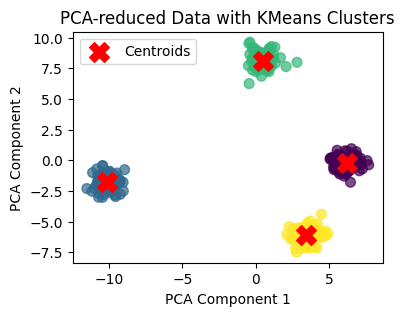

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('PCA-reduced Data with KMeans Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()